In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import warnings     # 대응할 필요 없는 자잘한 경고문은 생략
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data = boston.data
label = boston.target
columns = boston.feature_names

In [5]:
data = pd.DataFrame(data, columns=columns)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
data.shape

(506, 13)

In [7]:
# Simple Linear Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2,random_state=2022) 

In [8]:
X_train['RM'].values.reshape((-1,1))[:5]  # -1을 사용하면 (어떤 숫자인지 모르는)맨 끝 수가 지정됨

array([[7.454],
       [6.315],
       [6.382],
       [5.942],
       [8.247]])

In [9]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [10]:
sim_lr.fit(X_train['RM'].values.reshape((-1,1)) ,y_train)

LinearRegression()

In [11]:
# 방의 갯수로 예측
y_pred = sim_lr.predict(X_test['RM'].values.reshape((-1,1)))

In [12]:
# 결과 살펴보기
from sklearn.metrics import r2_score
print('단순 선형 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred)))

단순 선형 회귀, R2: 0.2121


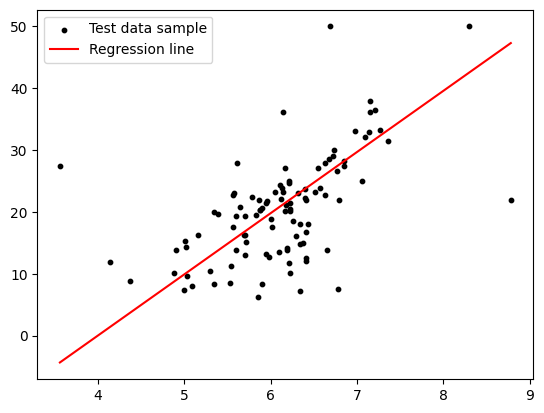

In [13]:
# 결과 시각화 하기 

line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

plt.scatter(X_test['RM'], y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Test data sample','Regression line'], loc='upper left')

In [14]:
# Multiple Linear regression
mul_lr = LinearRegression()
mul_lr.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = mul_lr.predict(X_test)

In [16]:
print('다중 선형 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred)))

다중 선형 회귀, R2: 0.6226


In [17]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=5)

In [18]:
dt_regr.fit(X_train['RM'].values.reshape(-1,1), y_train)

DecisionTreeRegressor(max_depth=5)

In [19]:
y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1, 1))

In [20]:
print('단순 결정 트리 회귀 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

단순 결정 트리 회귀 R2: 0.3247


Depth를 조절하면 학습이 정도를 조정할 수 있는데, 이것을 어떻게 조정하느냐에 따라서 실제 테스트의 결과가 꽤 달라진다!

Depth를 너무 높이면 학습 데이터를 굉장히 가깝게 따라가고(overfit), 너무 낮추면 지나치게 일반적인 방향으로 간다(underfit).

따라서 Depth를 적절히 조정해야하며, 그러기 위해서 반복문을 통해 쭉 돌린 후, 가장 적절한 Depth값을 찾는다

In [21]:
arr = np.arange(1,11)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [22]:
best_depth = 0
best_r2 = 0

for depth in arr:
    dt_regr = DecisionTreeRegressor(max_depth=depth)

    dt_regr.fit(X_train['RM'].values.reshape(-1,1), y_train)
    y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1, 1))

    temp_r2 = r2_score(y_test, y_pred)
    print('\n단순 결정 트리 회귀 depth={} R2: {:.4f}'.format(depth, temp_r2))

    if (best_r2 < temp_r2):
        best_depth = depth
        best_r2 = temp_r2

print('최적의 결과는 depth={} r2={:.4f}'.format(best_depth, best_r2))


단순 결정 트리 회귀 depth=1 R2: 0.2459

단순 결정 트리 회귀 depth=2 R2: 0.3547

단순 결정 트리 회귀 depth=3 R2: 0.3931

단순 결정 트리 회귀 depth=4 R2: 0.3816

단순 결정 트리 회귀 depth=5 R2: 0.3247

단순 결정 트리 회귀 depth=6 R2: 0.3474

단순 결정 트리 회귀 depth=7 R2: 0.3164

단순 결정 트리 회귀 depth=8 R2: 0.3368

단순 결정 트리 회귀 depth=9 R2: 0.3098

단순 결정 트리 회귀 depth=10 R2: 0.2579
최적의 결과는 depth=3 r2=0.3931


In [23]:
best_depth = 0
best_r2 = 0

for depth in arr:
    dt_regr = DecisionTreeRegressor(max_depth=depth)
    dt_regr.fit(X_train, y_train)

    y_pred = dt_regr.predict(X_test)
    temp_r2 = r2_score(y_test, y_pred)
    print('다중 결정 트리 depth: {}, R2: {:.4f}'.format(depth, temp_r2))

    if (best_r2 < temp_r2):
        best_depth = depth
        best_r2 = temp_r2

print('다중 결정 트리 최적 depth: {}, R2: {:.4f}'.format(best_depth, best_r2))

다중 결정 트리 depth: 1, R2: 0.2459
다중 결정 트리 depth: 2, R2: 0.5316
다중 결정 트리 depth: 3, R2: 0.6575
다중 결정 트리 depth: 4, R2: 0.6835
다중 결정 트리 depth: 5, R2: 0.7008
다중 결정 트리 depth: 6, R2: 0.7177
다중 결정 트리 depth: 7, R2: 0.7372
다중 결정 트리 depth: 8, R2: 0.7522
다중 결정 트리 depth: 9, R2: 0.7444
다중 결정 트리 depth: 10, R2: 0.7232
다중 결정 트리 최적 depth: 8, R2: 0.7522


In [24]:
# Support Vector machine Regressor
from sklearn.svm import SVR
best_C = 0
best_r2 = 0
arr = range(1, 21)

for c in arr:
    svm_regr = SVR(C=c)
    svm_regr.fit(X_train['RM'].values.reshape(-1,1), y_train)

    y_pred = svm_regr.predict(X_test['RM'].values.reshape(-1,1))
    temp_r2 = r2_score(y_test, y_pred)
    print('단순 서포트 벡터 머신 회귀 C: {}, R2: {:.4f}'.format(c, temp_r2))

    if (best_r2 < temp_r2):
        best_C = c
        best_r2 = temp_r2

print('단순 서포트 벡터 머신 회귀 최적 C: {}, R2: {:.4f}'.format(best_C, best_r2))

단순 서포트 벡터 머신 회귀 C: 1, R2: 0.3763
단순 서포트 벡터 머신 회귀 C: 2, R2: 0.4202
단순 서포트 벡터 머신 회귀 C: 3, R2: 0.4176
단순 서포트 벡터 머신 회귀 C: 4, R2: 0.4139
단순 서포트 벡터 머신 회귀 C: 5, R2: 0.4049
단순 서포트 벡터 머신 회귀 C: 6, R2: 0.3929
단순 서포트 벡터 머신 회귀 C: 7, R2: 0.3925
단순 서포트 벡터 머신 회귀 C: 8, R2: 0.3921
단순 서포트 벡터 머신 회귀 C: 9, R2: 0.3906
단순 서포트 벡터 머신 회귀 C: 10, R2: 0.3845
단순 서포트 벡터 머신 회귀 C: 11, R2: 0.3824
단순 서포트 벡터 머신 회귀 C: 12, R2: 0.3811
단순 서포트 벡터 머신 회귀 C: 13, R2: 0.3822
단순 서포트 벡터 머신 회귀 C: 14, R2: 0.3833
단순 서포트 벡터 머신 회귀 C: 15, R2: 0.3834
단순 서포트 벡터 머신 회귀 C: 16, R2: 0.3836
단순 서포트 벡터 머신 회귀 C: 17, R2: 0.3837
단순 서포트 벡터 머신 회귀 C: 18, R2: 0.3834
단순 서포트 벡터 머신 회귀 C: 19, R2: 0.3832
단순 서포트 벡터 머신 회귀 C: 20, R2: 0.3832
단순 서포트 벡터 머신 회귀 최적 C: 2, R2: 0.4202


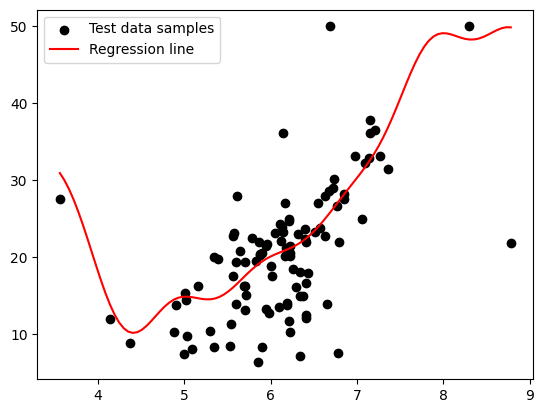

In [25]:
# 결과의 시각화
line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 100)
line_y = svm_regr.predict(line_x.reshape(-1,1))

plt.scatter(X_test['RM'], y_test, c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Test data samples', 'Regression line'], loc='upper left')

In [26]:
best_C = 0
best_r2 = 0
arr = range(9900, 10000)

for c in arr:
    svm_regr = SVR(C=c)
    svm_regr.fit(X_train, y_train)

    y_pred = svm_regr.predict(X_test)
    temp_r2 = r2_score(y_test, y_pred)
    # print('다중 서포트 벡터 머신 회귀 C:{}, R2 : {:.4f}'.format(c, temp_r2))

    if (best_r2 < temp_r2):
        best_C = c
        best_r2 = temp_r2

print('다중 서포트 벡터 회귀 최적 C: {}, R2: {:.4f}'.format(best_C, best_r2))

다중 서포트 벡터 회귀 최적 C: 9998, R2: 0.7047


In [33]:
# Multi Layer Perceptron Regressor
from sklearn.neural_network import MLPRegressor
mlp_regr = MLPRegressor(solver='adam', hidden_layer_sizes=300, max_iter = 600)
# solver? 문제를 어떻게 해결할 것인가? lbfgs, sgd, adam 등등 근데 adam이 좋음



mlp_regr.fit(X_train, y_train)
y_pred = mlp_regr.predict(X_test)

print('다중 MLP 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred)))

다중 MLP 회귀, R2: 0.6191
